### Постановка задачи
Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

#### Признаки
DateCrawled — дата скачивания анкеты из базы  
VehicleType — тип автомобильного кузова  
RegistrationYear — год регистрации автомобиля  
Gearbox — тип коробки передач  
Power — мощность (л. с.)  
Model — модель автомобиля  
Kilometer — пробег (км)  
RegistrationMonth — месяц регистрации автомобиля  
FuelType — тип топлива  
Brand — марка автомобиля  
NotRepaired — была машина в ремонте или нет  
DateCreated — дата создания анкеты  
NumberOfPictures — количество фотографий автомобиля  
PostalCode — почтовый индекс владельца анкеты (пользователя)  
LastSeen — дата последней активности пользователя  
Целевой признак  
Price — цена (евро)

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
autos = pd.read_csv('/datasets/autos.csv')

In [3]:
autos

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


Предобработка данных:
- Избавиться от заглавных букв в названиях столбцов  
- проанализировать пропуски
- рассмотреть категориальные переменные и необходимость их кодирования  
- рассмотреть численные переменные и необходимость их масштабирования

In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [5]:
autos.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245814 entries, 3 to 354367
Data columns (total 16 columns):
DateCrawled          245814 non-null object
Price                245814 non-null int64
VehicleType          245814 non-null object
RegistrationYear     245814 non-null int64
Gearbox              245814 non-null object
Power                245814 non-null int64
Model                245814 non-null object
Kilometer            245814 non-null int64
RegistrationMonth    245814 non-null int64
FuelType             245814 non-null object
Brand                245814 non-null object
NotRepaired          245814 non-null object
DateCreated          245814 non-null object
NumberOfPictures     245814 non-null int64
PostalCode           245814 non-null int64
LastSeen             245814 non-null object
dtypes: int64(7), object(9)
memory usage: 31.9+ MB


Пропусков достаточно, но даже при удалении всех записей с пропусками, остается достаточно объемный датасет. 
Также можно удалить следующие столбцы:
- DateCrawled — дата скачивания анкеты из базы  
- RegistrationMonth — месяц регистрации автомобиля  
- DateCreated — дата создания анкеты  
- NumberOfPictures — количество фотографий автомобиля  
- PostalCode — почтовый индекс владельца анкеты (пользователя)  
- LastSeen — дата последней активности пользователя  

Переименуем названия столбцов

In [6]:
autos.columns = list(x.lower() for x in autos.columns)

In [7]:
autos

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [8]:
autos[['datecrawled','datecreated','lastseen']] = pd.to_datetime(autos[['datecrawled','datecreated','lastseen']]
                                                                 .stack(), format='%Y-%m-%d %H:%M:%S').unstack()

In [9]:
autos.datecrawled.describe()

count                  354369
unique                 271174
top       2016-03-24 14:49:47
freq                        7
first     2016-03-05 14:06:22
last      2016-04-07 14:36:58
Name: datecrawled, dtype: object

Объявления за месяц

In [10]:
autos.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'kilometer', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [11]:
autos = autos.drop(axis = 1, labels = ['datecrawled','registrationmonth', 'datecreated', 
                                       'numberofpictures','postalcode','lastseen'])

#### 'price'

In [12]:
autos.price.describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

In [13]:
autos[autos['price']<100]['price'].describe()

count    13314.000000
mean         5.425792
std         18.124827
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.000000
Name: price, dtype: float64

Цены представлены в евро. При этом значительное количество предложений с крайне низкими ценниками.

In [14]:
autos[(autos['price']<100)&(autos['price']>0)].head(30)

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired
59,1,suv,1994,manual,286,NaN,150000,NaN,sonstige_autos,NaN
89,1,sedan,1995,manual,113,e_klasse,150000,gasoline,mercedes_benz,no
268,1,sedan,1990,manual,90,80,70000,petrol,audi,no
408,1,NaN,2000,NaN,75,golf,90000,petrol,volkswagen,NaN
552,50,NaN,1985,NaN,0,NaN,150000,NaN,trabant,NaN
901,1,NaN,1990,manual,0,other,150000,NaN,porsche,NaN
943,98,small,1997,manual,53,swift,150000,petrol,suzuki,no
967,1,wagon,1998,manual,136,omega,150000,petrol,opel,no
1025,3,convertible,1998,manual,110,mx_reihe,150000,NaN,mazda,yes
1076,45,NaN,2015,NaN,0,other,5000,NaN,mini,NaN


In [15]:
import matplotlib.pyplot as plt

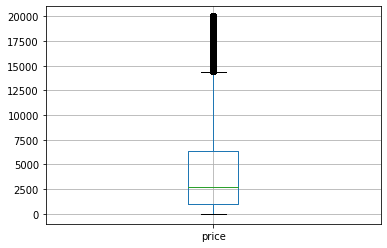

In [16]:
autos.boxplot('price')

Если стоимость машины определяется по рынку, то она вряд ли может стоить меньше 100 евро. И хоть по диаграмме разброса эти значения не являются выбросами, считаю, что такие предложения необходимо удалить. 

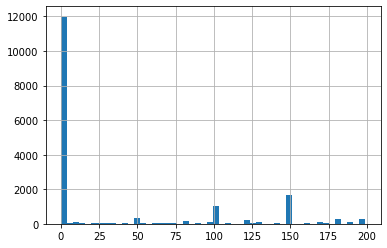

In [17]:
autos[autos['price']<200]['price'].hist(bins = 50)

In [18]:
autos = autos.drop(autos[autos['price']<100].index)

In [19]:
autos.price.describe()

count    341055.000000
mean       4588.861052
std        4514.844700
min         100.000000
25%        1200.000000
50%        2900.000000
75%        6500.000000
max       20000.000000
Name: price, dtype: float64

#### 'vehicletype'

In [20]:
autos['vehicletype'].value_counts()

sedan          89087
small          77444
wagon          63465
bus            28265
convertible    19817
coupe          15555
suv            11762
other           3048
Name: vehicletype, dtype: int64

In [21]:
autos[autos['vehicletype'].isna()]

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
16,300,NaN,2016,NaN,60,polo,150000,petrol,volkswagen,NaN
22,2900,NaN,2018,manual,90,meriva,150000,petrol,opel,no
26,5555,NaN,2017,manual,125,c4,125000,NaN,citroen,no
31,899,NaN,2016,manual,60,clio,150000,petrol,renault,NaN
...,...,...,...,...,...,...,...,...,...,...
354338,180,NaN,1995,NaN,0,NaN,125000,petrol,opel,NaN
354346,2600,NaN,2005,auto,0,c_klasse,150000,NaN,mercedes_benz,NaN
354351,1900,NaN,2000,manual,110,NaN,150000,NaN,volkswagen,no
354361,5250,NaN,2016,auto,150,159,150000,NaN,alfa_romeo,no


Повторов нет. Но имеется значительное количество пропусков. Можно заполнить по аналогии с объектами, у которых совпадает модель. Создадим фрейм соответствия названия моделей типу кузова. Т.к. одна модель может выпускаться в разных кузовах, отсортируем по убыванию количества предложений и заполним самым часто встречающимся значением

In [22]:
model_type = autos.pivot_table(columns=['model','vehicletype'], values=['price'], aggfunc='count')

In [23]:
model_type

       model   vehicletype
price  100     convertible      1
               coupe            2
               sedan          263
               wagon          103
       145     coupe            2
                             ... 
       zafira  other           22
               sedan           22
               small           11
               suv              7
               wagon          223
Length: 1118, dtype: int64

In [24]:
model_type = model_type.reset_index().sort_values(by = 0, ascending = False)

In [25]:
model_type_list = []
for model in model_type.model.unique():
    vehicletype = model_type[model_type['model']==model].iloc[0,2]
    model_type_list.append([model,vehicletype])

In [26]:
model_type = pd.DataFrame(columns = ['model','vehicletype'], data = model_type_list)

In [27]:
model_type

,model,vehicletype
0,golf,sedan
1,corsa,small
2,polo,small
3,3er,sedan
4,passat,wagon
...,...,...
245,serie_2,suv
246,kalina,sedan
247,range_rover_evoque,suv
248,rangerover,other


In [28]:
autos = autos.merge(model_type, on = 'model', how = 'left')

In [29]:
autos['vehicletype_x'] = autos['vehicletype_x'].fillna(autos['vehicletype_y'])

In [30]:
autos[autos['vehicletype_x'].isna()]['model'].value_counts()

Series([], Name: model, dtype: int64)

Оставшиеся незаполненными значения соотвествуют объектам, где также не указана модель. Такие значения можно сбросить. Т.к. для использования таких данных недостаточно информации

In [31]:
autos = autos.drop('vehicletype_y', axis =1)

In [32]:
autos.dropna(subset = ['model'], inplace = True)

In [33]:
autos[autos['model'].isna()]

,price,vehicletype_x,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired


In [34]:
autos.columns

Index(['price', 'vehicletype_x', 'registrationyear', 'gearbox', 'power',
       'model', 'kilometer', 'fueltype', 'brand', 'notrepaired'],
      dtype='object')

In [35]:
columns = ['price', 'vehicletype', 'registrationyear', 'gearbox', 'power',
       'model', 'kilometer', 'fueltype', 'brand', 'notrepaired']

In [36]:
autos.columns = columns

#### 'registrationyear'

In [37]:
autos.registrationyear.describe()

count    324022.000000
mean       2003.784903
std          55.744809
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registrationyear, dtype: float64

In [38]:
autos[autos['registrationyear'].isna()]['registrationyear'].count()

0

In [39]:
autos[autos['registrationyear']<1920]

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired
14,450,small,1910,NaN,0,ka,5000,petrol,ford,NaN
9820,1250,sedan,1910,NaN,0,other,5000,NaN,audi,NaN
15451,190,wagon,1000,NaN,0,mondeo,5000,NaN,ford,NaN
17537,7999,sedan,1500,manual,224,impreza,5000,NaN,subaru,NaN
22839,3900,wagon,1910,manual,90,passat,150000,petrol,volkswagen,NaN
34573,200,other,1910,NaN,0,caddy,150000,gasoline,volkswagen,NaN
47128,600,small,1910,manual,0,agila,5000,NaN,opel,yes
51564,330,small,1000,NaN,0,polo,5000,NaN,volkswagen,NaN
54127,950,sedan,1400,manual,1400,golf,125000,petrol,volkswagen,NaN
60433,3400,small,1910,manual,90,beetle,90000,NaN,volkswagen,no


Думаю, объявления с годом выпуска менее 1920 г. можно смело удалить.

In [40]:
autos=autos.drop(autos[autos['registrationyear']<1920].index)

#### 'gearbox'

In [41]:
autos['gearbox'].value_counts()

manual    248822
auto       61633
Name: gearbox, dtype: int64

In [42]:
autos[autos['gearbox'].isna()]['price'].count()

13528

In [43]:
autos.dropna(subset = ['gearbox'], inplace = True)

Повторов и пропусков нет

#### 'power'

In [44]:
autos.head()

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired
0,480,sedan,1993,manual,0,golf,150000,petrol,volkswagen,NaN
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


In [45]:
autos['power'].describe()

count    310455.000000
mean        115.413786
std         183.310420
min           0.000000
25%          75.000000
50%         106.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

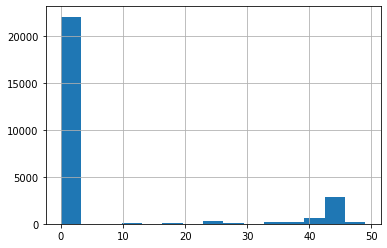

In [46]:
autos[autos['power']<50]['power'].hist(bins = 15)

Заменим нулевые значения мощности из сводной таблицы, полученной из имеющихся данных. Используем связку год выпуска/модель/тип коробки передач

In [47]:
autos_notna = autos.dropna()

In [48]:
power = autos_notna[autos_notna['power']>0].pivot_table(columns=['registrationyear','model','gearbox'], 
                                                        values=['power'], aggfunc='median')

In [49]:
power = pd.DataFrame(power.reset_index())

In [50]:
power

,level_0,registrationyear,model,gearbox,0
0,power,1923,c3,manual,9.5
1,power,1929,other,manual,15.0
2,power,1930,other,manual,24.0
3,power,1931,other,auto,40.0
4,power,1932,other,manual,18.0
...,...,...,...,...,...
6918,power,2018,zafira,manual,120.0
6919,power,2019,156,manual,140.0
6920,power,2019,c_klasse,manual,122.0
6921,power,2019,polo,manual,90.0


In [51]:
power = power.drop(axis =1, columns = 'level_0')

In [52]:
power.columns = ['registrationyear', 'model', 'gearbox','power']

In [53]:
autos = autos.merge(power, on = ['model','registrationyear','gearbox'], how = 'left',suffixes=('', '_y'))

In [54]:
autos['power'] = autos['power'].replace(0, np.nan)

In [55]:
autos['power'] = autos['power'].fillna(autos['power_y'])

#### kilometer

In [56]:
autos.kilometer.describe()

count    310455.000000
mean     128763.218502
std       36513.122595
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [57]:
autos[autos['kilometer'].isna()]

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired,power_y


#### fueltype

In [58]:
autos.fueltype.value_counts()

petrol      195437
gasoline     91135
lpg           4739
cng            518
hybrid         199
other           95
electric        58
Name: fueltype, dtype: int64

Объекты с незаполненными данными придется сбросить. Также необходим объединить типы petrol и gasoline

In [59]:
autos[autos['fueltype'].isna()]['price'].count()

18274

In [60]:
autos.dropna(subset = ['fueltype'], inplace = True)

In [61]:
autos[autos['fueltype'].isna()]['price'].count()

0

In [62]:
autos['fueltype'] = autos['fueltype'].replace('gasoline','petrol')

#### brand

In [63]:
autos.brand.value_counts()

volkswagen       63240
opel             32113
bmw              31474
mercedes_benz    27875
audi             25119
ford             20723
renault          14452
peugeot           9037
fiat              7772
seat              5842
skoda             4961
mazda             4675
citroen           4314
nissan            4149
toyota            4091
smart             3899
hyundai           3075
mini              2969
volvo             2803
mitsubishi        2481
honda             2309
kia               2123
suzuki            1931
alfa_romeo        1916
chevrolet         1479
chrysler          1170
dacia              805
daihatsu           625
subaru             619
porsche            617
jeep               577
land_rover         487
saab               458
jaguar             446
daewoo             422
lancia             371
rover              328
trabant            260
lada               174
Name: brand, dtype: int64

In [64]:
autos[autos['brand'].isna()]['price'].count()

0

#### Repaire

In [65]:
autos.notrepaired.value_counts()

no     221556
yes     27810
Name: notrepaired, dtype: int64

Думаю здесь имеет смысл заполнить пропущенные значения на "нет". 

In [66]:
autos.notrepaired  = autos.notrepaired.fillna('no')

In [67]:
autos[autos['notrepaired'].isna()]['price'].count()

0

In [68]:
autos

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired,power_y
0,480,sedan,1993,manual,75.0,golf,150000,petrol,volkswagen,no,75.0
1,9800,suv,2004,auto,163.0,grand,125000,petrol,jeep,no,163.0
2,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no,101.0
3,3600,small,2008,manual,69.0,fabia,90000,petrol,skoda,no,80.0
4,650,sedan,1995,manual,102.0,3er,150000,petrol,bmw,yes,116.0
...,...,...,...,...,...,...,...,...,...,...,...
310450,3200,sedan,2004,manual,225.0,leon,150000,petrol,seat,yes,150.0
310451,1150,bus,2000,manual,115.0,zafira,150000,petrol,opel,no,115.0
310452,1199,convertible,2000,auto,101.0,fortwo,125000,petrol,smart,no,54.0
310453,9200,bus,1996,manual,102.0,transporter,150000,petrol,volkswagen,no,102.0


In [69]:
autos = autos.drop(axis=1, columns = 'power_y')

C пропусками закончили. Теперь необходимо подготовить количественнеые и категориальные признаки. Для категориальных признаков применим порядковое кодирование. Численные переменные масштабируем с помощью StandardScaler

In [70]:
numeric_clmns = ['power','kilometer']

In [71]:
cat_clmns = ['vehicletype', 'registrationyear', 'gearbox', 'model','fueltype', 'brand', 'notrepaired']

In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
for i in cat_clmns:
    print(i, ' ',autos[autos[i].isna()]['price'].count())

vehicletype   0
registrationyear   0
gearbox   0
model   0
fueltype   0
brand   0
notrepaired   0


In [74]:
encoder = OrdinalEncoder()

In [75]:
encoder.fit(autos[cat_clmns])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [76]:
autos[cat_clmns] = encoder.transform(autos[cat_clmns])

In [77]:
autos

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired
0,480,4.0,60.0,1.0,75.0,116.0,150000,5.0,37.0,0.0
1,9800,6.0,71.0,0.0,163.0,117.0,125000,5.0,14.0,0.0
2,1500,5.0,68.0,1.0,75.0,116.0,150000,5.0,37.0,0.0
3,3600,5.0,75.0,1.0,69.0,101.0,90000,5.0,31.0,0.0
4,650,4.0,62.0,1.0,102.0,11.0,150000,5.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
310450,3200,4.0,71.0,1.0,225.0,140.0,150000,5.0,30.0,1.0
310451,1150,0.0,67.0,1.0,115.0,249.0,150000,5.0,24.0,0.0
310452,1199,1.0,67.0,0.0,101.0,106.0,125000,5.0,32.0,0.0
310453,9200,0.0,63.0,1.0,102.0,224.0,150000,5.0,37.0,0.0


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
scaler.fit(autos[numeric_clmns])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
autos[numeric_clmns] = scaler.transform(autos[numeric_clmns])

In [81]:
autos

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired
0,480,4.0,60.0,1.0,-0.287171,116.0,0.589800,5.0,37.0,0.0
1,9800,6.0,71.0,0.0,0.239661,117.0,-0.092805,5.0,14.0,0.0
2,1500,5.0,68.0,1.0,-0.287171,116.0,0.589800,5.0,37.0,0.0
3,3600,5.0,75.0,1.0,-0.323091,101.0,-1.048451,5.0,31.0,0.0
4,650,4.0,62.0,1.0,-0.125529,11.0,0.589800,5.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
310450,3200,4.0,71.0,1.0,0.610838,140.0,0.589800,5.0,30.0,1.0
310451,1150,0.0,67.0,1.0,-0.047702,249.0,0.589800,5.0,24.0,0.0
310452,1199,1.0,67.0,0.0,-0.131516,106.0,-0.092805,5.0,32.0,0.0
310453,9200,0.0,63.0,1.0,-0.125529,224.0,0.589800,5.0,37.0,0.0


Выделим тестовую выборку и разделим признаки

In [82]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(autos, shuffle=True, test_size=0.2)

In [83]:
train_x = train.drop(axis=1,columns='price')

In [84]:
test_x = test.drop(axis=1,columns='price')

In [85]:
train_y = train.price

In [86]:
test_y = test.price

# 2. Обучение моделей

В качестве моделей попробуем CatBoostRegressor и LGBMRegressor. Сначала произведем грубый подбор гиперпараметров с использованием кросс-валидации, используя метрику RMSE. По наилучшим параметрам обучим модели на тренировочной выборке и проверим показатели целевой метрики на тестовом множестве. Чтобы оценить быстродействие моделей на этапе обучения и предсказания используем модули библиотеки Timeit.

### CatBoostRegressor

In [87]:
from catboost import CatBoostRegressor

In [88]:
from sklearn.metrics.scorer import make_scorer

In [89]:
import timeit

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
from sklearn.metrics import mean_squared_error as MSE

In [92]:
def RMSE(y_actual, y_predict):
    return MSE(y_actual, y_predict)**.5

In [93]:
my_scorer = make_scorer(RMSE, greater_is_better = False)

Ячейки с подбором гиперпараметров (c 94 по 98)

In [94]:
params = {'learning_rate': [.1, .3],
          'random_state':[42],
          'depth': [6, 10],
          'verbose':[False]}

In [95]:
model_CatB = GridSearchCV(estimator = CatBoostRegressor(), 
                          param_grid= params, 
                          cv=3, 
                          n_jobs=-1, 
                          scoring = my_scorer)

In [96]:
%%time
model_CatB.fit(train_x,train_y)
fit_RMSE_CatB = model_CatB.best_score_

CPU times: user 32min 56s, sys: 3min 51s, total: 36min 48s
Wall time: 37min 44s


In [97]:
print('Оптимальные гиперпараметры:', model_CatB.best_params_)
print('RMSE на тренировочной выборке:', fit_RMSE_CatB)

Оптимальные гиперпараметры: {'depth': 10, 'learning_rate': 0.1, 'random_state': 42, 'verbose': False}
RMSE на тренировочной выборке: -1564.4907424467904


In [98]:
model_CatB = model_CatB.best_estimator_
start_time = timeit.default_timer()
model_CatB.fit(train_x,train_y)
fit_time_CatB = round(timeit.default_timer() - start_time, 1)
print('время обучения: {} сек'.format(fit_time_CatB))

время обучения: 269.6 сек


Раскомментировать ячейку с объявлением модели с оптимальными настройками.

In [112]:
''' 
model_CatB = CatBoostRegressor(depth = 10, learning_rate = .1, random_state=42, verbose=False)
start_time = timeit.default_timer()
model_CatB.fit(train_x,train_y)
fit_time_CatB = round(timeit.default_timer() - start_time, 1)
print('время обучения: {} сек'.format(fit_time_CatB))
'''

"model_CatB = model_CatB.best_estimator_\nstart_time = timeit.default_timer()\nmodel_CatB.fit(train_x,train_y)\nfit_time_CatB = round(timeit.default_timer() - start_time, 1)\nprint('время обучения: {} сек'.format(fit_time_CatB))\n"

In [99]:
start_time = timeit.default_timer()
predictions_catb = model_CatB.predict(test_x)
predict_time_CatB = round(timeit.default_timer() - start_time, 3)
RMSE_CatB = RMSE(test_y, predictions_catb)

In [100]:
print('RMSE на тестовой выборке:', RMSE_CatB)
print('время предсказания: {} сек'.format(predict_time_CatB))

RMSE на тестовой выборке: 1547.9383275048665
время предсказания: 0.458 сек


### LightGBM

In [101]:
from lightgbm import LGBMRegressor

In [102]:
params = {'learning_rate': [.1, .3], 
          'max_depth': [7, 10, -1], 
          'n_estimators':[80, 100],
          'random_state':[42],
          'verbose':[1]
         }

In [103]:
model_gbm = GridSearchCV(estimator = LGBMRegressor(),
                      param_grid= params, 
                      cv=3, 
                      n_jobs=-1, 
                      scoring = my_scorer)

In [104]:
%%time
model_gbm.fit(train_x,train_y)
RMSE_gbm = model_gbm.best_score_

CPU times: user 7min 40s, sys: 0 ns, total: 7min 40s
Wall time: 7min 45s


In [105]:
print('Оптимальные гиперпараметры:', model_gbm.best_params_)
print('RMSE на тренировочной выборке:', RMSE_gbm)


Оптимальные гиперпараметры: {'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 100, 'random_state': 42, 'verbose': 1}
RMSE на тренировочной выборке: -1647.462657105039


In [106]:
model_gbm = model_gbm.best_estimator_
start_time = timeit.default_timer()
model_gbm.fit(train_x,train_y)
fit_time_gbm = round(timeit.default_timer() - start_time, 1)
print('время обучения: {} сек'.format(fit_time_gbm))

время обучения: 8.8 сек


In [107]:
start_time = timeit.default_timer()
predictions_gbm = model_gbm.predict(test_x)
predict_time_gbm = round(timeit.default_timer() - start_time, 3)

In [108]:
RMSE_gbm = RMSE(test_y, predictions_gbm)

In [109]:
print('RMSE на тестовой выборке:', RMSE_gbm)
print('время предсказания: {} сек'.format(predict_time_gbm))

RMSE на тестовой выборке: 1635.0310803792956
время предсказания: 0.494 сек


### Проверка на адекватность

In [110]:
predictions_median = pd.Series(index = test_y.index, data = train_y.median())

In [111]:
print('RMSE константной модели:', RMSE(test_y, predictions_median))

RMSE константной модели: 4901.408520517438


# 3. Анализ моделей

В результате работы двух моделей можно сделать следующие выводы.  
Модель CatBoostRegressor значительно дольше обучается. На тренировочной выборке время обучения составило 270 секунд против 9 секунд у LightGBM. Особенно критично это становится при подборе гиперпараметров: при переборе весьма небольшого количества гиперпараметров время обучения составило 38 и 8 минут соответственно. Однако, значения целевой метрики и времени предсказания у модели CatBoostRegressor  лучше - 1548 против 1635 у LightGBM. Время предсказания у моделей сопоставимое, но CatBoostRegressor немного (-8%), но быстрее. Хотя для пользователя разница не будет заметна: 0,458 сек. против 0,494 сек. Также обе модели показали значительно лучший результат, чем константная модель с медианным значением, её RMSE=4901. Хотя в скорости она вне конкуренции. 